## RECONOCIMIENTO DE OBJETOS 

*Gina Maritza Martinez Lopez*

In [1]:
!pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://download.pytorch.org/whl/cu117


In [2]:
pip install ultralytics

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import ultralytics as YOLO



In [4]:
from ultralytics import YOLO

In [5]:
img1 = cv2.imread("image_1.jpg")
img2 = cv2.imread("image_2.jpg")
img3 = cv2.imread("image_3.jpg")
img4= cv2.imread("image_4.jpg")
img5 = cv2.imread("image_5.jpeg")
img6 = cv2.imread("image_6.jpeg")

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4_rgb = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
img5_rgb = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
img6_rgb = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)


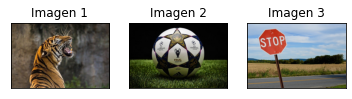

In [6]:
plt.figure()
plt.subplot(1,3,1)
plt.imshow(img1_rgb)
plt.title("Imagen 1")
plt.xticks([]), plt.yticks([])


plt.subplot(1,3,2)
plt.imshow(img2_rgb)
plt.title("Imagen 2")
plt.xticks([]), plt.yticks([])


plt.subplot(1, 3, 3)
plt.imshow(img3_rgb)
plt.title("Imagen 3")
plt.xticks([]), plt.yticks([])


plt.show()

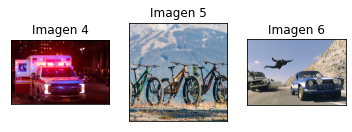

In [7]:
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(img4_rgb)
plt.title("Imagen 4")
plt.xticks([]), plt.yticks([])


plt.subplot(1, 3, 2)
plt.imshow(img5_rgb)
plt.title("Imagen 5")
plt.xticks([]), plt.yticks([])


plt.subplot(1, 3, 3)
plt.imshow(img6_rgb)
plt.title("Imagen 6")
plt.xticks([]), plt.yticks([])


plt.show()


 Realice la clasificación de las imágenes 1, 2, 3, y 4 mediante la red neuronal convolucional (CNN) DenseNet (densenet201). Cargue el modelo (frozen model) utilizando OpenCV y el framework Caffe. Visualice en RGB la imagen, la categoría y la puntuación máxima asignadas por la red con ayuda de la base de datos de nombres de clases de ImageNet.

Primero cargamos la lbase de datos de nombres de clases (ImageNet)

In [8]:
with open("classification_classes_ILSVRC2012.txt", 'r') as f:
    class_names = f.read().split('\n')
class_names = [name.split(',')[0] for name in class_names]

Se carga el modelo DenseNet(Frozen model) usando framework caffe

In [9]:
DenseNet = cv2.dnn.readNet(
    model='DenseNet_201.caffemodel', config='DenseNet_201.prototxt', framework='caffe')

Establecemos ROI de entrada blob en BGR

In [10]:
def Clasificador_denset(imagen, imagen_rgb):
  blob = cv2.dnn.blobFromImage(
      image=imagen, scalefactor=0.01, size=(224, 224))
  DenseNet.setInput(blob)
  outputs= DenseNet.forward()
  final_outputs= outputs[0].reshape(1000,1)
  probs= np.exp(final_outputs)/ np.sum(np.exp(final_outputs))
  final_prob = np.max(probs)* 100
  label_id = np.argmax(final_outputs)
  out_name = class_names[label_id]
  out_text = f"{out_name}, {final_prob:.3f}"
  cv2.putText(imagen_rgb, out_text, (25,50), cv2.FONT_HERSHEY_TRIPLEX, 1, (255,255,255), 2)

  return imagen_rgb


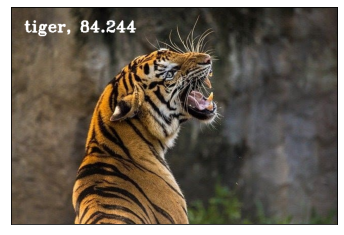

In [11]:
img1_rgb = Clasificador_denset(img1, img1_rgb)
plt.figure()
plt.imshow(img1_rgb)
plt.xticks([]), plt.yticks([])
plt.show()


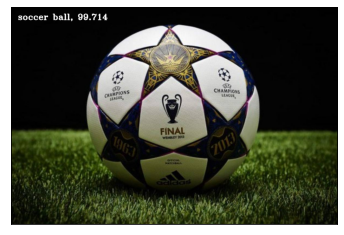

In [12]:
img2_rgb = Clasificador_denset(img2, img2_rgb)
plt.figure()
plt.imshow(img2_rgb)
plt.xticks([]), plt.yticks([])
plt.show()


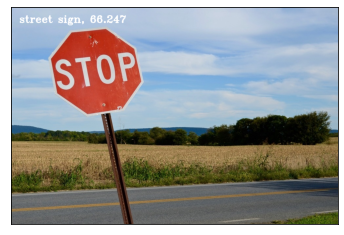

In [13]:
img3_rgb = Clasificador_denset(img3, img3_rgb)
plt.figure()
plt.imshow(img3_rgb)
plt.xticks([]), plt.yticks([])
plt.show()


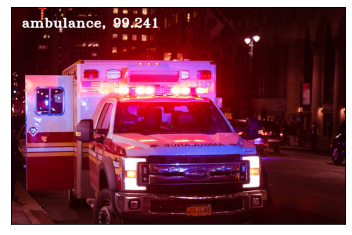

In [14]:
img4_rgb = Clasificador_denset(img4, img4_rgb)
plt.figure()
plt.imshow(img4_rgb)
plt.xticks([]), plt.yticks([])
plt.show()


Se observa como con el clasificador DenseNet las imagenes fueron clasficadas de forma exitosa respectivamente mayor al 66%.

#### b. Realice la clasificación de las imágenes 1, 2, 3, y 4 mediante la red neuronal convolucional (CNN) EfficientNet en su versión sencilla (efficientnet-b0). Cargue el modelo utilizando el framework PyTorch. Visualice en RGB la imagen, la categoría y la puntuación máxima asignadas por la red con ayuda de la base de datos de nombres de clases de EfficientNet. 

In [15]:
pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
pip install efficientnet_pytorch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
img1 = cv2.imread("image_1.jpg")
img2 = cv2.imread("image_2.jpg")
img3 = cv2.imread("image_3.jpg")
img4 = cv2.imread("image_4.jpg")
img5 = cv2.imread("image_5.jpeg")
img6 = cv2.imread("image_6.jpeg")

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4_rgb = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
img5_rgb = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
img6_rgb = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from efficientnet_pytorch import EfficientNet
from sklearn import preprocessing
from PIL import Image
import json


In [19]:
class_names = json.load(open('EfficientNet_labels.txt'))
class_names = [class_names[str(i)] for i in range(1000)]
class_names = [name.split(',')[0] for name in class_names]


In [20]:
model = EfficientNet.from_pretrained('efficientnet-b0')
model.eval()

Loaded pretrained weights for efficientnet-b0


EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d((0, 1, 0, 1))
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False
    

In [21]:
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [22]:
# Clasificar una imagen
def clasificar_efficientnet(imagen, imagen_rgb, modelo):
    img_PIL = Image.fromarray(imagen_rgb)
    imagen_preprocesada = preprocess(img_PIL).unsqueeze(0)
    with torch.no_grad():
        output = modelo(imagen_preprocesada)
        probabilities = torch.nn.functional.softmax(output, dim=1)[0]
        predicted_class_index = torch.argmax(probabilities).item()
        predicted_class_name = class_names[predicted_class_index]
        max_probability = probabilities[predicted_class_index].item() * 100

    out_text = f"{predicted_class_name}, {max_probability:.3f}"
    cv2.putText(imagen_rgb, out_text, (25, 50),
                cv2.FONT_HERSHEY_TRIPLEX, 1, (255, 255, 255), 2)

    return imagen_rgb


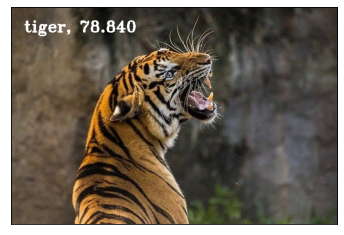

In [23]:
img1_rgb = clasificar_efficientnet(img1, img1_rgb, model)
plt.figure()
plt.imshow(img1_rgb)
plt.xticks([]), plt.yticks([])
plt.show()


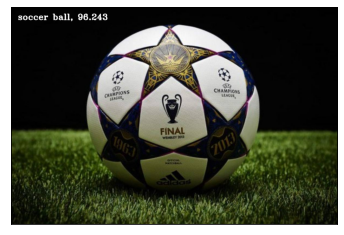

In [24]:
img2_rgb = clasificar_efficientnet(img2, img2_rgb, model)
plt.figure()
plt.imshow(img2_rgb)
plt.xticks([]), plt.yticks([])
plt.show()


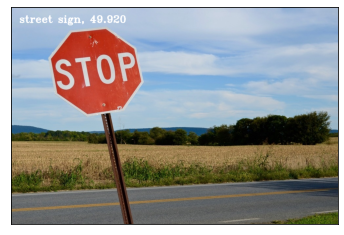

In [25]:
img3_rgb = clasificar_efficientnet(img3, img3_rgb, model)
plt.figure()
plt.imshow(img3_rgb)
plt.xticks([]), plt.yticks([])
plt.show()


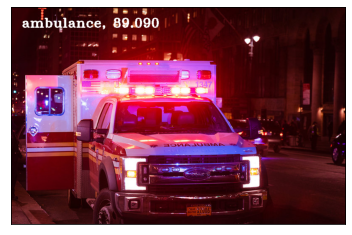

In [26]:
img4_rgb = clasificar_efficientnet(img4, img4_rgb, model)
plt.figure()
plt.imshow(img4_rgb)
plt.xticks([]), plt.yticks([])
plt.show()


#### c. Realice la clasificación de las imágenes 1, 2, 3, y 4 mediante la red neuronal convolucional (CNN) EfficientNet en su versión robusta (efficientnet-b7). Cargue el modelo utilizando el framework PyTorch. Visualice en RGB la imagen, la categoría y la puntuación máxima asignadas por la red con ayuda de la base de datos de nombres de clases de EfficientNet.

In [27]:
img1 = cv2.imread("image_1.jpg")
img2 = cv2.imread("image_2.jpg")
img3 = cv2.imread("image_3.jpg")
img4 = cv2.imread("image_4.jpg")
img5 = cv2.imread("image_5.jpeg")
img6 = cv2.imread("image_6.jpeg")

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4_rgb = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
img5_rgb = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
img6_rgb = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)


Se carga el modelo robusto

In [28]:
model_pro = EfficientNet.from_pretrained('efficientnet-b7')
model_pro.eval()

Loaded pretrained weights for efficientnet-b7


EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 64, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d((0, 1, 0, 1))
  )
  (_bn0): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        64, 64, kernel_size=(3, 3), stride=[1, 1], groups=64, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        64, 16, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        16, 64, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False
  

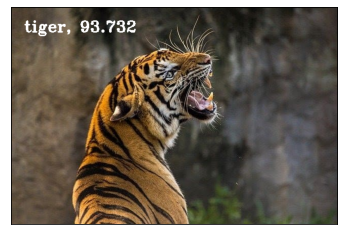

In [29]:
img1_rgb = clasificar_efficientnet(img1, img1_rgb, model_pro)
plt.figure()
plt.imshow(img1_rgb)
plt.xticks([]), plt.yticks([])
plt.show()


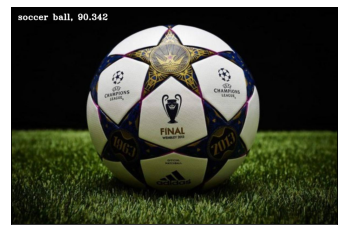

In [30]:
img2_rgb = clasificar_efficientnet(img2, img2_rgb, model_pro)
plt.figure()
plt.imshow(img2_rgb)
plt.xticks([]), plt.yticks([])
plt.show()


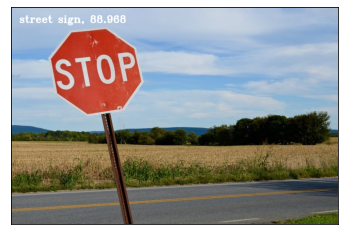

In [31]:
img3_rgb = clasificar_efficientnet(img3, img3_rgb, model_pro)
plt.figure()
plt.imshow(img3_rgb)
plt.xticks([]), plt.yticks([])
plt.show()


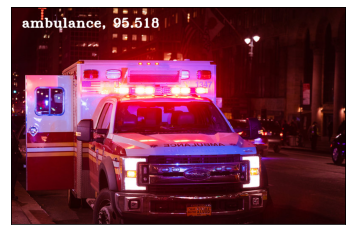

In [32]:
img4_rgb = clasificar_efficientnet(img4, img4_rgb, model_pro)
plt.figure()
plt.imshow(img4_rgb)
plt.xticks([]), plt.yticks([])
plt.show()


#### d. Realice para las imágenes 1, 2, 3, y 4 la comparación de las puntuaciones máximas asignadas por cada una de las 3 redes de clasificación mencionadas anteriormente

|  | DenseNet | EfficientNet b-0 | EfficientNet b-7 |
| --- | --- | --- | --- |
| Imagen 1 | 84.244 | 78.840 | 93.732 |
| Imagen 2 | 99.714 | 96.243 | 90.342 |
| Imagen 3 | 66.247 | 49.920 | 88.968 |
| Imagen 4 | 99.241 | 89.090 | 95.518 |

Como se observa los tres modelos fueron exitosos a la hora de predeccir la imagen, sin embargo, como se observa en la anterior tabla EfficienNet b-0 fue la que menos tuvo puntuación maxima asignada a cada imagen, mientras que DenseNet y EfficientNet b-7 robusta tienen puntuaciones máximas bastante altas, DenseNet tiene una puntuación máxima promedio de 87.3615 y EfficientNet b-7 tiene una puntuación máxima promedio de 92.14 lo cual lo hace el modelo con mayor puntuación máxima entre las imagenes 1,2,3 y 4.

### 2

• Realice el reconocimiento de objetos de las imágenes 3, 4, 5, y 6 mediante la red neuronal convolucional (CNN) MobileNet-SSD. Cargue el modelo (frozen model) utilizando OpenCV y el framework TensorFlow. Visualice en RGB la imagen, el cuadro delimitador, la categoría, y la puntuación máxima asignadas por la red con ayuda de la base de datos de nombres de clases de COCO.

In [33]:

img3 = cv2.imread("image_3.jpg")
img4 = cv2.imread("image_4.jpg")
img5 = cv2.imread("image_5.jpeg")
img6 = cv2.imread("image_6.jpeg")

img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4_rgb = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
img5_rgb = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
img6_rgb = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)


In [34]:
with open ("object_detection_classes_coco.txt", "r") as f:
    class_names = f.read().split("\n")
class_names = [name.split(',')[0] for name in class_names] #obtener primer nombre de la lista

Se carga el modelo MobileNet-SSD (frozen model) usando framework TensorFlow

In [35]:
MobileNet_SSD= cv2.dnn.readNet(model='MobileNet_SSD.pb', config='ssd_mobilenet_coco.pbtxt.txt', framework='TensorFlow')

Se establece ROI

In [36]:
def redneuronal_mobilenet(imagen_rgb):
  blob = cv2.dnn.blobFromImage(image=imagen_rgb, size=(300, 300))
  MobileNet_SSD.setInput(blob)
  output=MobileNet_SSD.forward()
  [M, N, _] = imagen_rgb.shape  # guarda los valores del tamaño de la imagen
  colors= np.random.uniform(0,255, size=(len(class_names),3)) #color aleatorio para cada clase
  for detection in output[0, 0, :, :]:
    # obetener etiqueta de clase, asertividad de clase
    confidence = detection[2]
    if confidence > 0.4:  # probabilidad de clase mayor a 40%
        # obtener probabilidad maxima con 2 decimales
        final_prob = np.round(confidence, 2)
        class_id = detection[1]  # puntuación maxima de la etiqueta de clase
        # buscar etiqueta en base de datos de clases
        class_name = class_names[int(class_id)-1]
        color = colors[int(class_id)]  # signar un color aleatorio a cada clase
        box_x = detection[3] * N  # x,[x,y,w,h]
        box_y = detection[4] * M  # y,[x,y,w,h]
        box_w = detection[5] * N  # w,[x,y,w,h]
        box_h = detection[6] * N  # h,[x,y,w,h]
        cv2.rectangle(imagen_rgb,
                      (int(box_x), int(box_y)), (int(box_w), int(box_h)), color, thickness=2)  # dibujar cuadros delimitadores (ROI)
        out_text = f"{class_name} {final_prob:.2f}"
        # Dibujar nombre de clase y puntuacion max
        cv2.putText(imagen_rgb, out_text, (int(box_x), int(box_y-5)),
                    cv2.FONT_HERSHEY_TRIPLEX, 1, color, 2)
  return imagen_rgb

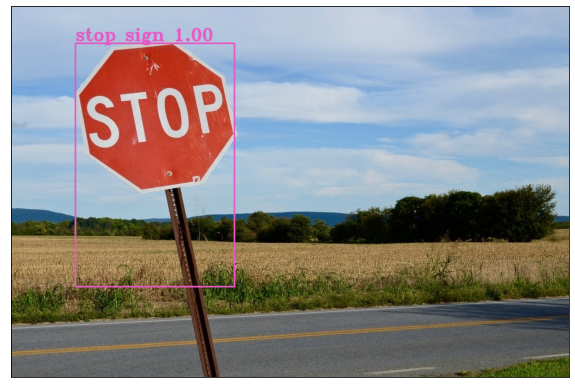

In [37]:
img3_rgb = redneuronal_mobilenet(img3_rgb)
plt.figure(figsize=(10,10))
plt.imshow(img3_rgb)
plt.xticks([]), plt.yticks([])
plt.show()


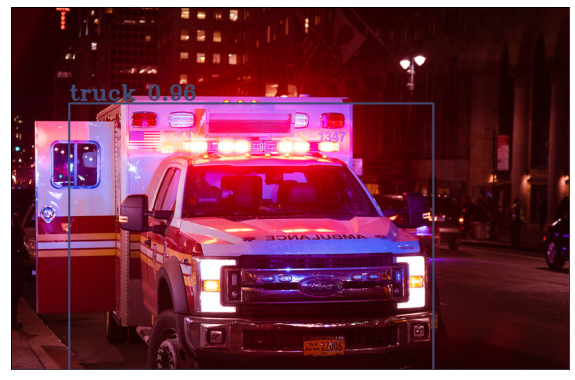

In [38]:
img4_rgb = redneuronal_mobilenet(img4_rgb)
plt.figure(figsize=(10, 10))
plt.imshow(img4_rgb)
plt.xticks([]), plt.yticks([])
plt.show()


No reconoce la persona al lado de la ambulancia.

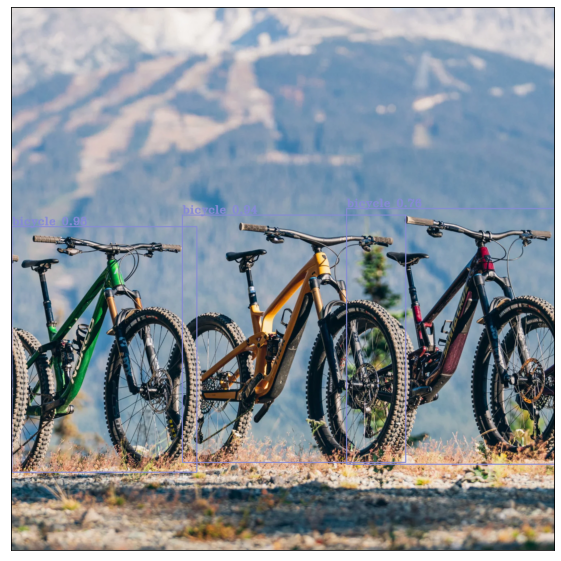

In [39]:
img5_rgb = redneuronal_mobilenet(img5_rgb)
plt.figure(figsize=(10, 10))
plt.imshow(img5_rgb)
plt.xticks([]), plt.yticks([])
plt.show()


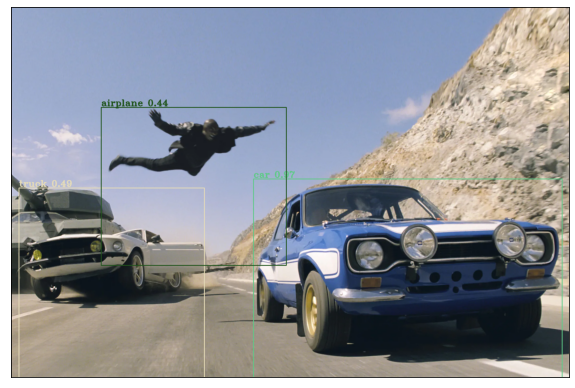

In [40]:
img6_rgb = redneuronal_mobilenet(img6_rgb)
plt.figure(figsize=(10, 10))
plt.imshow(img6_rgb)
plt.xticks([]), plt.yticks([])
plt.show()


Reconoce erroneamente la persona como airplane y no identifica el carro al lado del truck.

#### • Realice el reconocimiento de objetos de las imágenes 3, 4, 5, y 6 mediante la red neuronal convolucional (CNN) YOLOv8 en su versión sencilla (yolov8n). Cargue el modelo utilizando Ultralytics y el framework PyTorch. Visualice en RGB la imagen, el cuadro delimitador, la categoría, y la puntuación máxima asignadas por la red con ayuda de la base de datos de nombres de clases de Ultralytics.

In [41]:
img3 = cv2.imread("image_3.jpg")
img4 = cv2.imread("image_4.jpg")
img5 = cv2.imread("image_5.jpeg")
img6 = cv2.imread("image_6.jpeg")

img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4_rgb = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
img5_rgb = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
img6_rgb = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)


Cargamos modelo YOLOv8

In [42]:
YOLOv8 = YOLO("yolov8n.pt")

In [43]:
def redneuronal_yolo(imagen_rgb, modelo):
  results = modelo(imagen_rgb)
  img_inferred= results[0].plot() 

  return img_inferred


0: 448x640 1 stop sign, 68.2ms
Speed: 2.0ms preprocess, 68.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


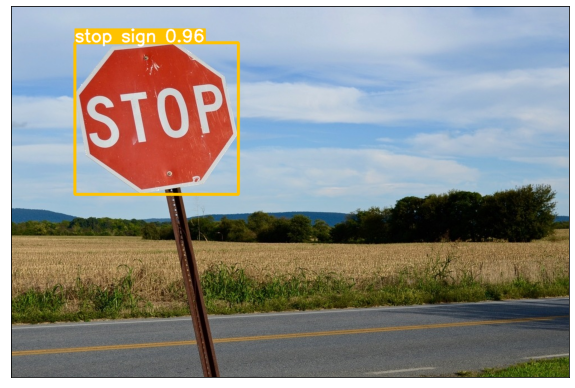

In [44]:
img_inferred = redneuronal_yolo(img3_rgb, YOLOv8)

plt.figure(figsize=(10, 10))
plt.imshow(img_inferred)
plt.xticks([]), plt.yticks([])
plt.show()



0: 416x640 3 persons, 1 car, 1 motorcycle, 1 truck, 70.1ms
Speed: 2.0ms preprocess, 70.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


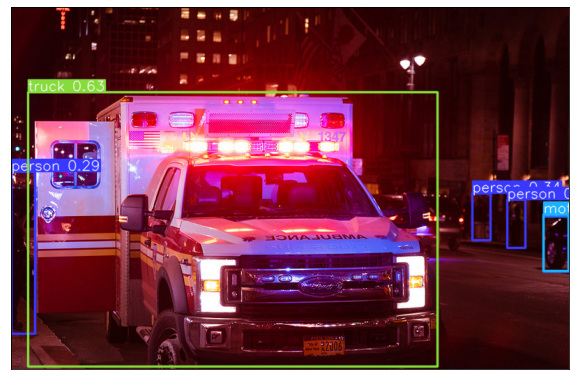

In [45]:
img_inferred = redneuronal_yolo(img4_rgb, YOLOv8)

plt.figure(figsize=(10, 10))
plt.imshow(img_inferred)
plt.xticks([]), plt.yticks([])
plt.show()



0: 640x640 3 bicycles, 91.5ms
Speed: 3.0ms preprocess, 91.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


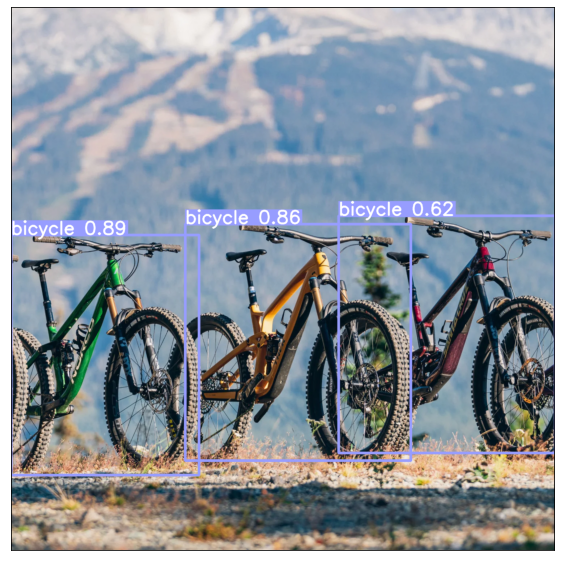

In [46]:
img_inferred = redneuronal_yolo(img5_rgb, YOLOv8)

plt.figure(figsize=(10, 10))
plt.imshow(img_inferred)
plt.xticks([]), plt.yticks([])
plt.show()



0: 448x640 2 cars, 1 airplane, 63.0ms
Speed: 2.0ms preprocess, 63.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


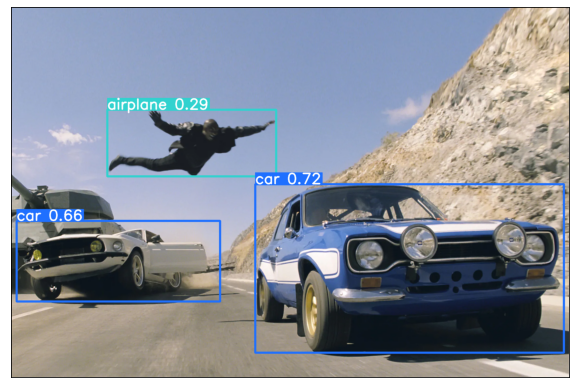

In [47]:
img_inferred = redneuronal_yolo(img6_rgb, YOLOv8)

plt.figure(figsize=(10, 10))
plt.imshow(img_inferred)
plt.xticks([]), plt.yticks([])
plt.show()


Se identifica mal la persona como un airplane y no reconoce el truck.

#### • Realice el reconocimiento de objetos de las imágenes 3, 4, 5, y 6 mediante la red neuronal convolucional (CNN) YOLOv8 en su versión robusta (yolov8x). Cargue el modelo utilizando Ultralytics y el framework PyTorch. Visualice en RGB la imagen, el cuadro delimitador, la categoría, y la puntuación máxima asignadas por la red con ayuda de la base de datos de nombres de clases de Ultralytics.

In [48]:
img3 = cv2.imread("image_3.jpg")
img4 = cv2.imread("image_4.jpg")
img5 = cv2.imread("image_5.jpeg")
img6 = cv2.imread("image_6.jpeg")

img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4_rgb = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
img5_rgb = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
img6_rgb = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)


In [49]:
YOLOv8x = YOLO("yolov8x.pt")



0: 448x640 1 stop sign, 648.9ms
Speed: 1.0ms preprocess, 648.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


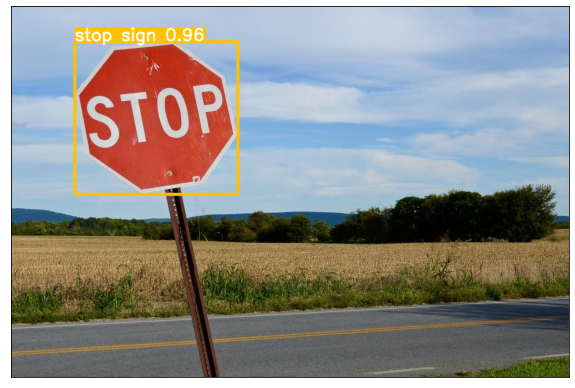

In [50]:
img_inferred = redneuronal_yolo(img3_rgb, YOLOv8x)

plt.figure(figsize=(10, 10))
plt.imshow(img_inferred)
plt.xticks([]), plt.yticks([])
plt.show()



0: 416x640 5 persons, 3 cars, 1 truck, 603.6ms
Speed: 2.0ms preprocess, 603.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


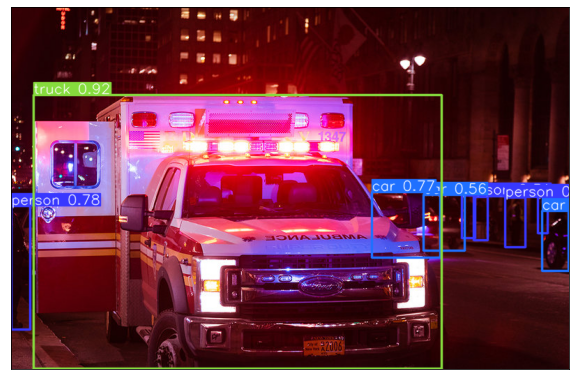

In [51]:
img_inferred = redneuronal_yolo(img4_rgb, YOLOv8x)

plt.figure(figsize=(10, 10))
plt.imshow(img_inferred)
plt.xticks([]), plt.yticks([])
plt.show()



0: 640x640 3 bicycles, 908.6ms
Speed: 4.8ms preprocess, 908.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


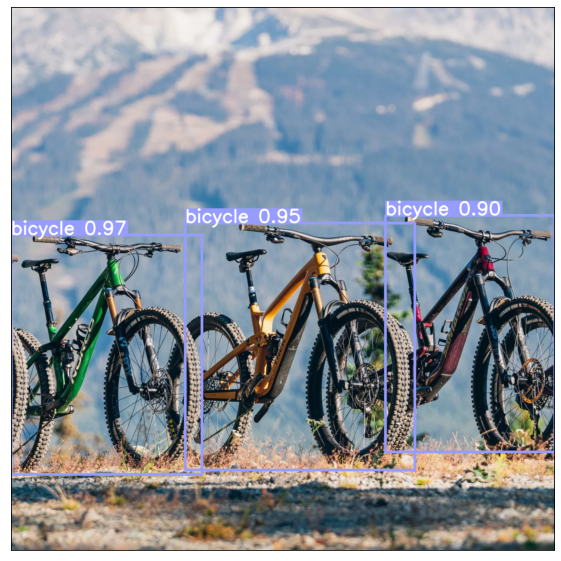

In [52]:
img_inferred = redneuronal_yolo(img5_rgb, YOLOv8x)

plt.figure(figsize=(10, 10))
plt.imshow(img_inferred)
plt.xticks([]), plt.yticks([])
plt.show()



0: 448x640 1 person, 2 cars, 636.3ms
Speed: 2.0ms preprocess, 636.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


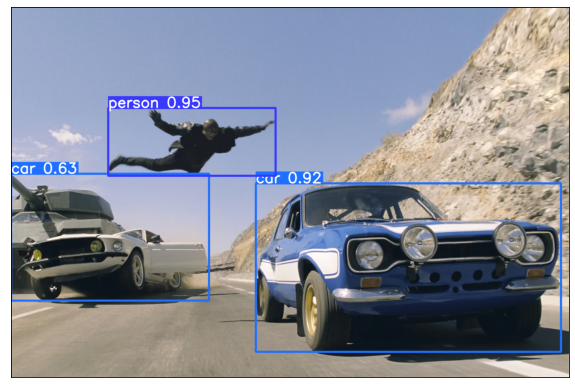

In [53]:
img_inferred = redneuronal_yolo(img6_rgb, YOLOv8x)

plt.figure(figsize=(10, 10))
plt.imshow(img_inferred)
plt.xticks([]), plt.yticks([])
plt.show()


Reconoce bien a la persona, los dos carros pero no reconoce el truck al lado del carro de la izquierda.

#### • Realice para las imágenes 3, 4, 5, y 6 la comparación de las puntuaciones máximas asignadas por cada una de las 3 redes de reconocimiento de objetos mencionadas anteriormente

|  | MobileNet | YOLOv8n |  YOLOv8x |
| --- | --- | --- | --- |
| Imagen 3 | 1 | 0.96 | 0.96 |
| Imagen 4 | truck 0.96 | truck 0.63 y person 0.29| truck 0.92 y person= 0.78 |
| Imagen 5 |  0.76 - 0.96 | 0.62 - 0.89 | 0.90-0.97 |
| Imagen 6 | airplane = 0.44, car = 0.97 y truck = 0.49 | airplane=0.29, car 0.66, car= 0.72 no identifica el truck| car=  0.63 y car 0.92 person= 0.95 no identifica el truck |

Se identifica algunas diferencias entre las 3 redes de reconocimiento de objetos, en MobileNet por ejemplo identifica perfecta la imnagen3 pero en la imagen 4 no tiene en cuenta la persona, luego YOLOv8n tiene menor puntraje máximo en el reconocimiento pero identifica en la imagen 4 la persona con 0.29, y en YOLOv8x hay puntuaciones máximas para el reconomiento de objetos en las imagenes, la señal con 0.96, luego la ambulancia con 0.92 y la persona con 0.78, la imagen 5 las biciletas entra 0.90 a 0.97 y la ultima imagen identifica correctamente que es una persona y no un airplane como lo hacen los otros dos, los carros con 0.62 y 0.92 solamente no identifica el truck. La red de reconomiento con mayor puntuación máxima es YOLOv8x, luego esta MobileNet y por ultimo YOLOv8n.